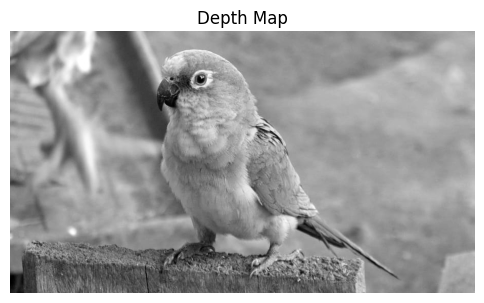

[[153 153 152 ... 167 167 168]
 [155 155 154 ... 169 169 170]
 [157 157 155 ... 171 171 172]
 ...
 [ 21  23  26 ... 169 174 177]
 [ 23  25  28 ... 170 174 177]
 [ 25  28  30 ... 171 173 175]]


In [2]:
from PIL import Image
import numpy as np
np.set_printoptions(linewidth=np.inf)
import matplotlib.pyplot as plt

# Load the depth map
depth_map = Image.open('images/bird.jpeg').convert('L')  # Convert to grayscale
depth_array = np.array(depth_map)

plt.figure(figsize=(6, 6))  # Adjust the figure size
plt.imshow(depth_array, cmap='gray')  # Show as grayscale
plt.title('Depth Map')  # Add a title
plt.axis('off')  # Hide axes
plt.show()

print(depth_array)

In [ ]:
import cv2

def adjust_color(pattern_pixel, depth_value, max_depth):
    # Normalize the depth value
    normalized_depth = depth_value / max_depth
    
    # Adjust the hue based on depth
    hue_shift = int(normalized_depth * 180)  # OpenCV hue range
    hsv_pixel = cv2.cvtColor(np.uint8([[pattern_pixel]]), cv2.COLOR_RGB2HSV)
    hsv_pixel[0][0][0] = (hsv_pixel[0][0][0] + hue_shift) % 180
    return cv2.cvtColor(hsv_pixel, cv2.COLOR_HSV2RGB)[0][0]

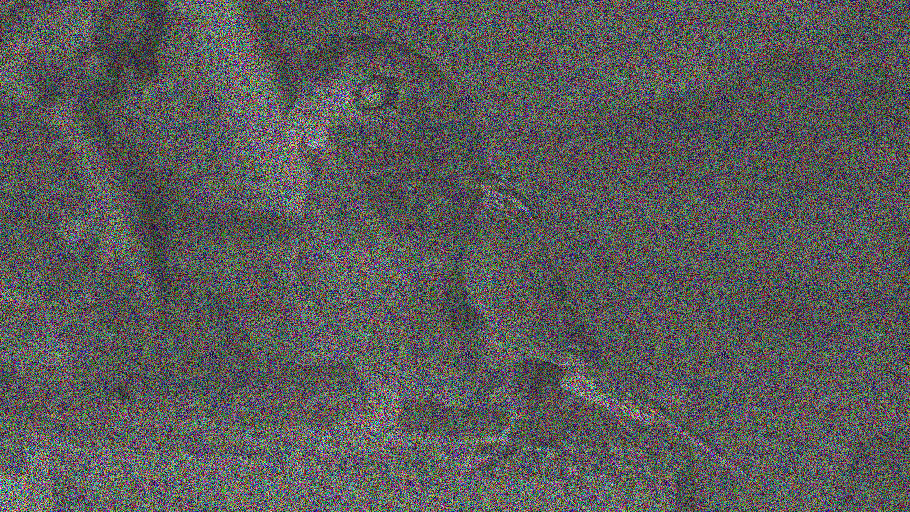

In [4]:
from PIL import Image
import numpy as np
import cv2  # For adjust_color function

# Load the depth map
depth_map = Image.open('images/bird.jpeg').convert('L')  # Grayscale
depth_array = np.array(depth_map)

# Load the base pattern
base_pattern = Image.open('patterns/base_pattern.png')
base_pattern_array = np.array(base_pattern)

# Get dimensions
height, width = depth_array.shape
base_height, base_width, _ = base_pattern_array.shape
max_depth = np.max(depth_array)

# Initialize the autostereogram
autostereogram = np.zeros((height, width, 3), dtype=np.uint8)

# Function to adjust color based on depth
def adjust_color(pixel, depth_value, max_depth):
    normalized_depth = depth_value / max_depth
    adjusted_pixel = pixel * (1 - normalized_depth * 0.5)  # Reduce brightness by depth
    return np.clip(adjusted_pixel, 0, 255).astype(np.uint8)

# Create the autostereogram
for y in range(height):
    for x in range(width):
        depth_value = depth_array[y, x]

        # Fetch the corresponding pixel from the base pattern (tiled)
        pattern_x = x % base_width
        pattern_y = y % base_height
        pattern_pixel = base_pattern_array[pattern_y, pattern_x]

        # Adjust the color of the base pattern pixel based on depth
        autostereogram[y, x] = adjust_color(pattern_pixel, depth_value, max_depth)

# Save or display the final image
final_image = Image.fromarray(autostereogram)
final_image.save('autostereogram_with_depth_colors.png')
final_image.show()
